# Target mapping

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings

df = pd.read_csv("2024Nov_HT_Phase3.8.csv", encoding='latin-1')
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Target column

In [2]:
df.head()

,tertiary_hp,age,gender,height,weight,bmi,marital_status,tobacco,encoded_comorbidities,magnesium,...,gallstones,KIRIKVAR,nephrolithiasis,bone_specific_alp,serum_calcium_phosphorus_ratio,third_surgery_pathology_report,fourth_surgery_pathology_report,triglycerides,hdl_cholesterol,encoded_target
0,0,0,-1,0.0,0.0,0.0,0,-1,0,0.00,...,-1,0,-1,0,0,0,0,0,0,0
1,0,65,0,0.0,0.0,0.0,0,-1,0,1.93,...,-1,0,-1,0,0,0,0,0,0,0
2,0,0,-1,0.0,0.0,0.0,0,-1,0,0.00,...,-1,0,-1,0,0,0,0,0,0,0
3,0,0,-1,0.0,0.0,0.0,0,-1,0,0.00,...,-1,0,-1,0,0,0,0,0,0,0
4,0,40,1,162.0,82.0,0.0,0,-1,0,1.75,...,-1,0,-1,0,0,0,0,0,0,1


In [3]:
# Check for non-numeric columns in X
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("Non-numeric columns in features (X):", non_numeric_columns)


Non-numeric columns in features (X): Index([], dtype='object')


Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       166
           1       0.62      0.68      0.65        44
           2       0.62      0.72      0.67        39
           3       0.55      0.24      0.33        25

    accuracy                           0.74       274
   macro avg       0.65      0.62      0.62       274
weighted avg       0.73      0.74      0.73       274



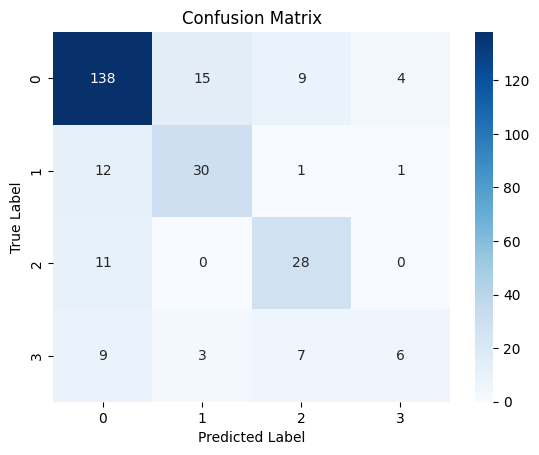

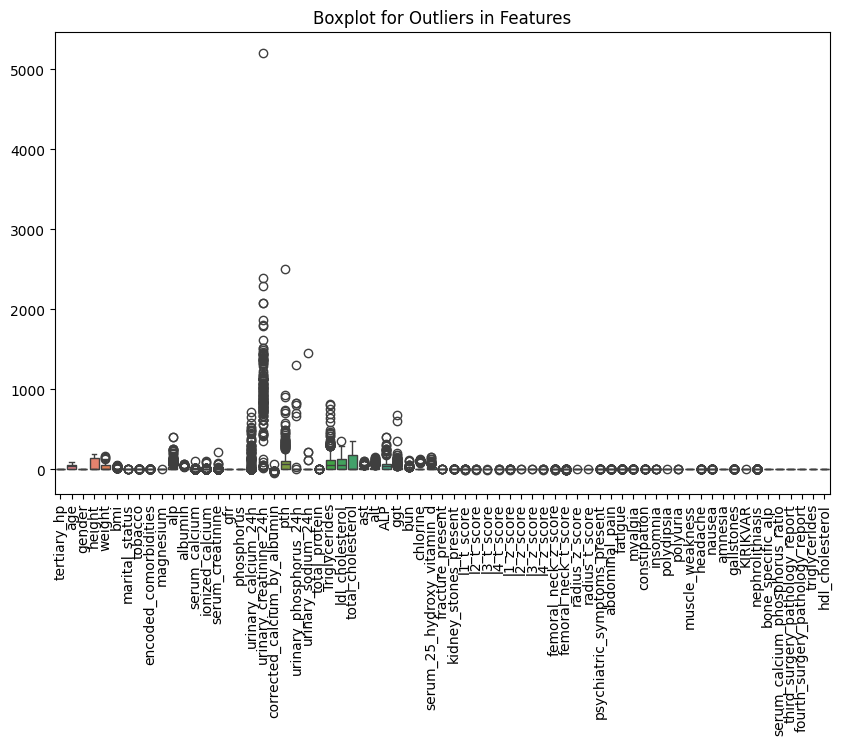

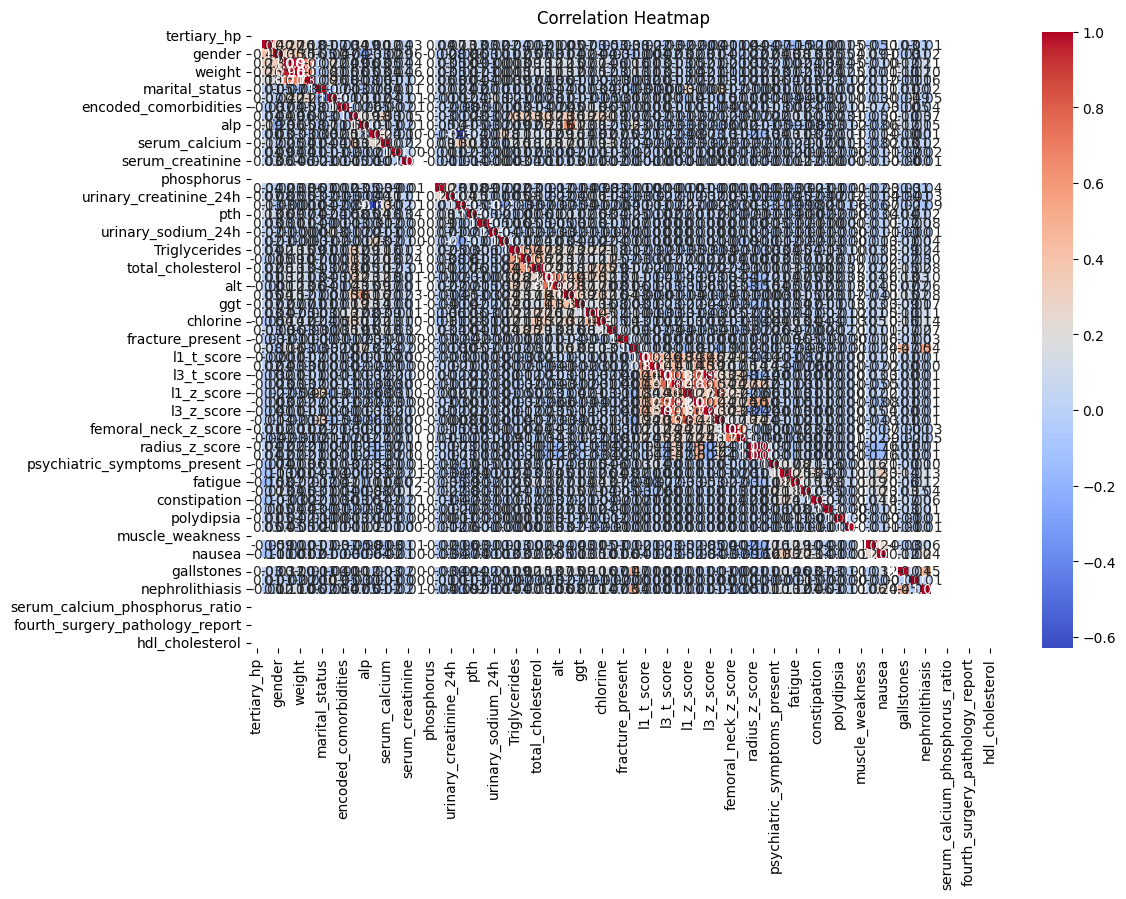


Top Important Features:
                         Feature  Importance
37                    l2_t_score    0.194523
35         kidney_stones_present    0.079525
19  corrected_calcium_by_albumin    0.058452
21        urinary_phosphorus_24h    0.046585
44          femoral_neck_z_score    0.037837
2                         gender    0.035891
45          femoral_neck_t_score    0.031895
12                 serum_calcium    0.030896
32                      chlorine    0.028804
10                           alp    0.028105
4                         weight    0.026995
5                            bmi    0.026606
51                       myalgia    0.025420
11                       albumin    0.024309
8          encoded_comorbidities    0.020733
7                        tobacco    0.019109
3                         height    0.017102
1                            age    0.016351
50                       fatigue    0.015814
60                    gallstones    0.015305
17           urinary_calcium_2

C:\Users\musab\AppData\Local\Temp\ipykernel_11304\1718232762.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(20), palette='viridis')


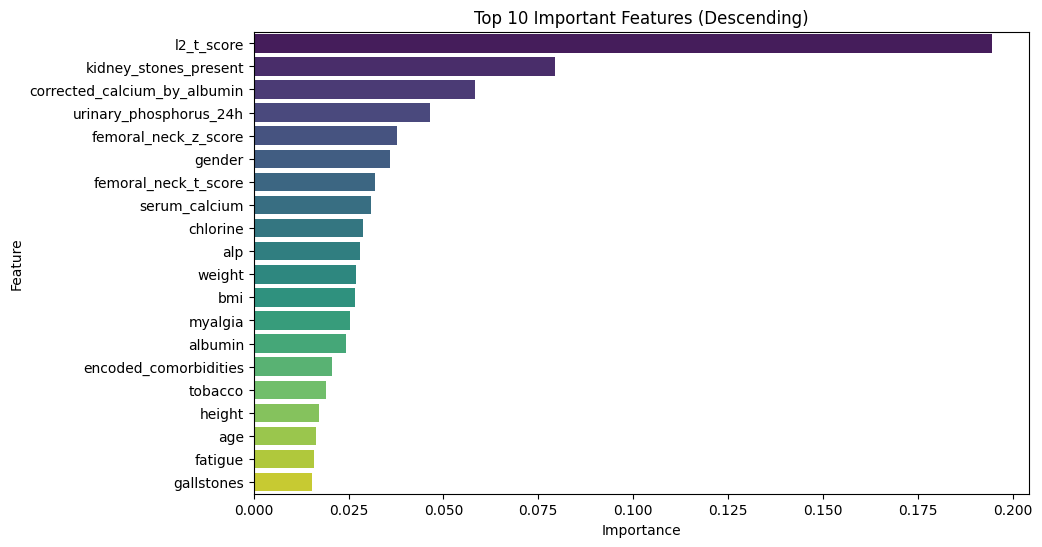


Accuracy after Feature Selection: 0.74


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Test the model
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Visualize outliers using a boxplot for each feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.title("Boxplot for Outliers in Features")
plt.xticks(rotation=90)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Feature Selection using XGBoost Feature Importance
importances = xgb_model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 important features in text
print("\nTop Important Features:")
print(feature_importances.head(30))

# Plotting the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(20), palette='viridis')
plt.title("Top 10 Important Features (Descending)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Select features with importance greater than a threshold (e.g., 0.05)
top_20_features = feature_importances.head(20)['Feature']
X_selected = X[top_20_features]

# Train the XGBoost model again with the selected features
X_train, X_test = train_test_split(X_selected, test_size=0.2, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Evaluate the model after Feature Selection
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy after Feature Selection: {accuracy:.2f}")


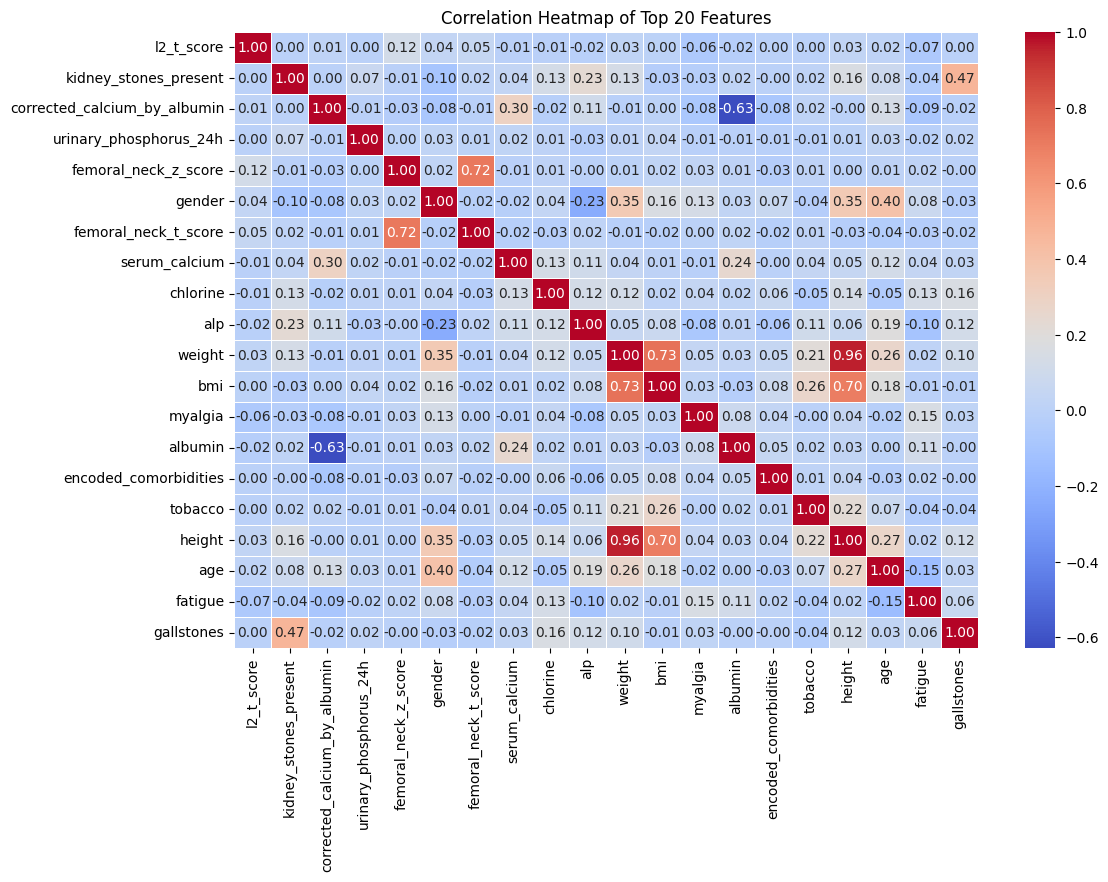

In [5]:
top_20_features = feature_importances.head(20)['Feature']

# Select only the top 20 features from X
X_top_20 = X[top_20_features]

# Compute the correlation matrix for the top 20 features
correlation_matrix = X_top_20.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Top 20 Features")
plt.show()


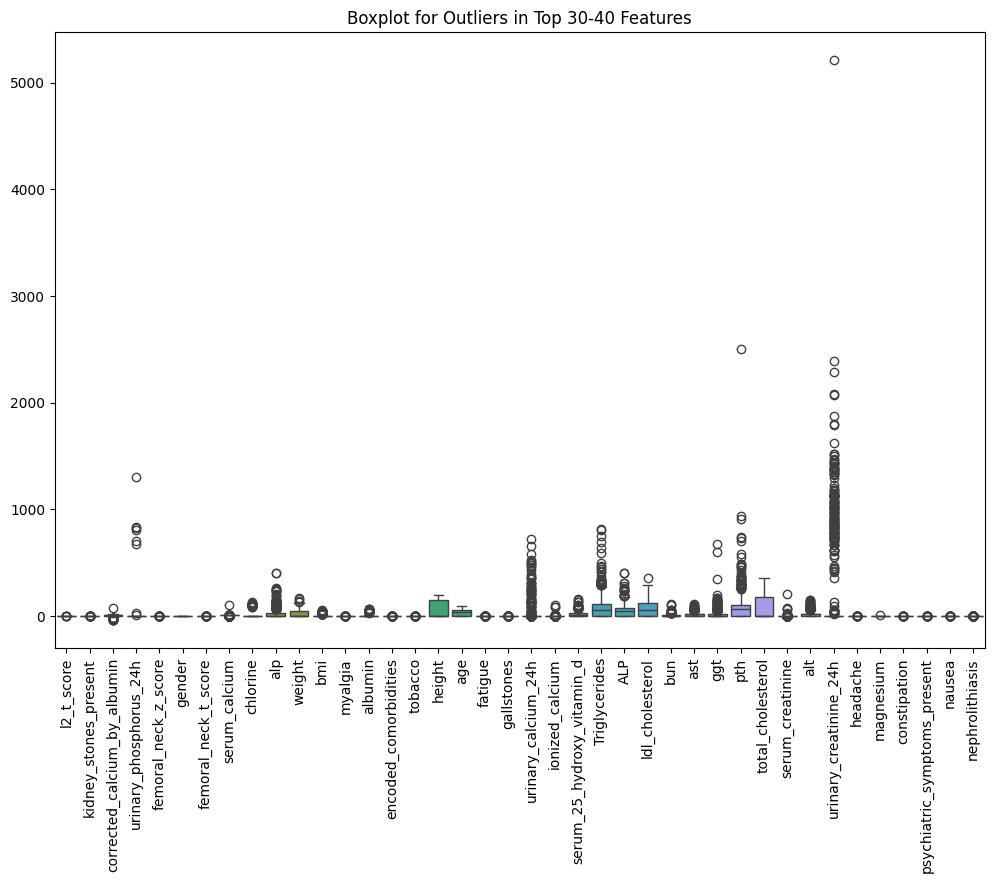

In [6]:
top_features = feature_importances.head(40)['Feature']

# Select only the top 30-40 features from X
X_top = X[top_features]

# Visualize outliers using boxplots for the top features
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_top)
plt.title("Boxplot for Outliers in Top 30-40 Features")
plt.xticks(rotation=90)
plt.show()


In [7]:
#df.to_excel('2024Nov_HT_Phase3.6.xlsx', index=False)
